In [1]:
import math
import string
import datetime
import chardet
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import os
import scipy
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go
sns.color_palette('bright')
sns.set(style='darkgrid',rc = {'figure.figsize':(15,8)})
from plotly.offline import iplot
from sklearn.pipeline import make_pipeline 
##!pip install dataprep
%matplotlib inline

In [2]:
df = pd.read_csv("chosenDataset/archive/creditcard.csv")
print(df.shape)

(284807, 31)


In [3]:
#dropping time
df.drop('Time',axis=1,inplace=True)

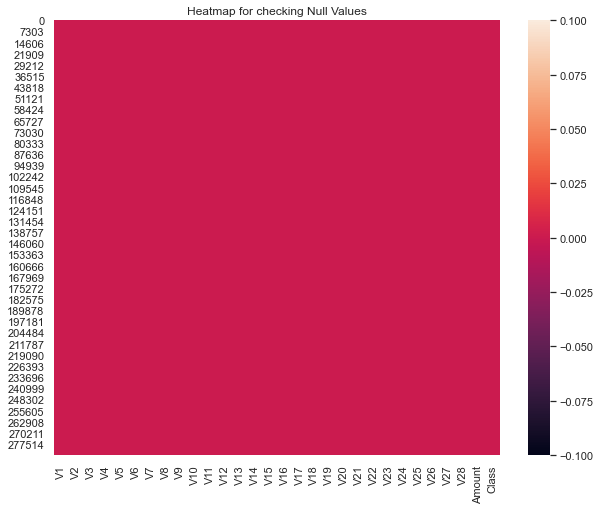

In [4]:
#visualising the  null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.title('Heatmap for checking Null Values')
plt.show()

DATA PREP REPORT HERE 
!pip install dataprep

Splitting Data in Training and Testing sets

In [5]:
#assiging x and y values
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#checking x value
print(X[0])
#checking y value
print(y[0])

[-1.35980713e+00 -7.27811733e-02  2.53634674e+00  1.37815522e+00
 -3.38320770e-01  4.62387778e-01  2.39598554e-01  9.86979013e-02
  3.63786970e-01  9.07941720e-02 -5.51599533e-01 -6.17800856e-01
 -9.91389847e-01 -3.11169354e-01  1.46817697e+00 -4.70400525e-01
  2.07971242e-01  2.57905802e-02  4.03992960e-01  2.51412098e-01
 -1.83067779e-02  2.77837576e-01 -1.10473910e-01  6.69280749e-02
  1.28539358e-01 -1.89114844e-01  1.33558377e-01 -2.10530535e-02
  1.49620000e+02]
0


In [6]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 69)
#printing the shapes of training and testing data
print("X_training set shape{},X_testing set shape{}".format(X_train.shape,X_test.shape))
print("y_training set shape{},y_testing set shape{}".format(y_train.shape,y_test.shape))

X_training set shape(189871, 29),X_testing set shape(94936, 29)
y_training set shape(189871,),y_testing set shape(94936,)


Feature Scaling

In [7]:
#standard feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [8]:
print(X_train)

[[ 0.46239937 -0.2242648   0.8362402  ...  0.1993436   0.09752352
  -0.07155411]
 [-0.99295805  0.70587263  0.21428175 ... -1.44938059  0.03056716
  -0.35595585]
 [-0.81735822 -0.11769472  0.72790596 ... -0.67018013 -0.04436543
   0.76708752]
 ...
 [ 1.11434857 -0.38937478 -0.89590604 ...  0.08842383 -0.05719895
  -0.28013459]
 [-0.07562601 -2.10205278  0.61868478 ... -0.2348743   0.42342461
   2.57108238]
 [-0.54211758  0.04808802  0.90044925 ...  0.15883986  0.55794031
  -0.35813628]]


Preparing Classification Models

In [46]:
#logistic regression training
from sklearn.linear_model import LogisticRegression
classifier_regressor = LogisticRegression(random_state = 2)
classifier_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#logistic regression prediction
y_pred_regressor = classifier_regressor.predict(X_test)

C:\Users\Piotr Laskowski\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [48]:
#knn training
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

C:\Users\Piotr Laskowski\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
#knn prediction
y_pred_knn = classifier_knn.predict(X_test)

In [13]:
#svm training
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
#svm prediction
y_pred_svm = classifier_svm.predict(X_test)


In [15]:
#kernel svm training
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 0)
classifier_ksvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
#kernel svm prediction
y_pred_ksvm = classifier_ksvm.predict(X_test)

In [17]:
#naive bayes training
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
#naive bayes prediction
y_pred_nb = classifier_nb.predict(X_test)

In [19]:
#decision tree training
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

C:\Users\Piotr Laskowski\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [20]:
#decision tree prediction
y_pred_dt = classifier_dt.predict(X_test)

In [21]:
#random forest training
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

C:\Users\Piotr Laskowski\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Piotr Laskowski\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Piotr Laskowski\Anaconda3\lib\site-packages\sklearn\ensembl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
#random forest prediction
y_pred_rf = classifier_rf.predict(X_test)

C:\Users\Piotr Laskowski\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [24]:
#XG boost training
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

[17:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [25]:
#xg boost prediction
y_pred_xg = classifier_xg.predict(X_test)

In [26]:
y_pred=pd.DataFrame()
y_pred['knn']=y_pred_knn

In [27]:
y_pred['svm']=y_pred_svm
y_pred['ksvm']=y_pred_ksvm
y_pred['navie bayes']=y_pred_nb
y_pred['decision tree']=y_pred_dt
y_pred['random forest']=y_pred_rf
y_pred['xg boost']=y_pred_xg

In [28]:
y_pred['real values']=y_test

In [29]:
y_pred

,knn,svm,ksvm,navie bayes,decision tree,random forest,xg boost,real values
0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
94931,0,0,0,0,0,0,0,0
94932,0,0,0,0,0,0,0,0
94933,0,0,0,0,0,0,0,0
94934,0,0,0,0,0,0,0,0


In [50]:
#confussion matrix regressor
from sklearn.metrics import confusion_matrix, accuracy_score
cm_regressor = confusion_matrix(y_test, y_pred_regressor)
print(cm_regressor)
accuracy_score(y_test, y_pred_regressor)

[[94763    18]
 [   50   105]]


0.999283727985169

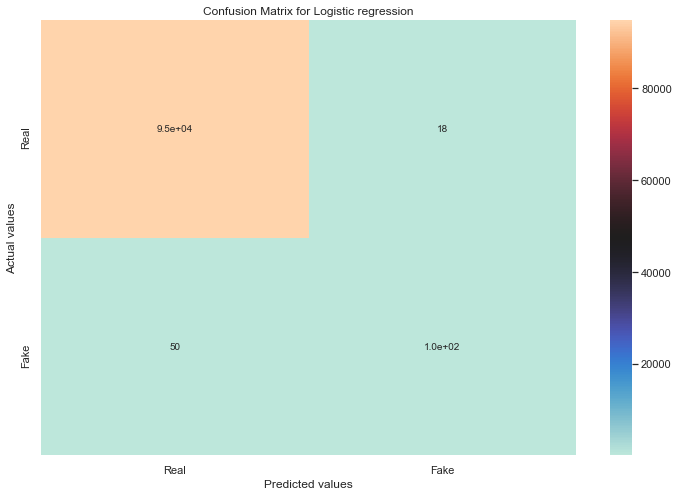

In [51]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_regressor)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regression')
plt.show()

In [32]:
#confussion matrix knn
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
accuracy_score(y_test, y_pred_knn)

[[94775     6]
 [   36   119]]


0.999557596696722

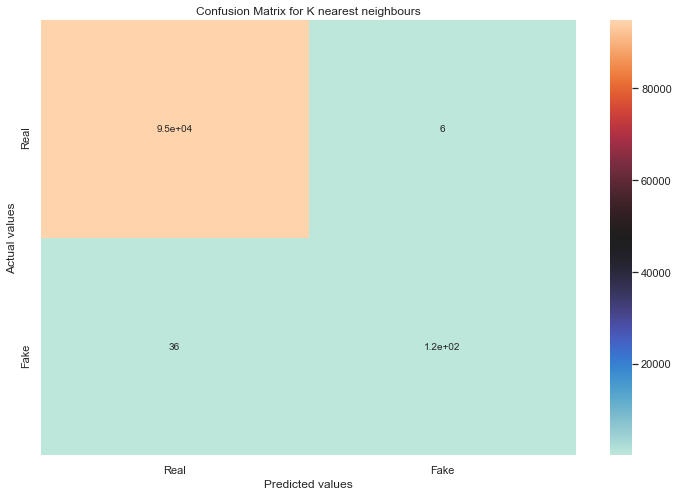

In [33]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for K nearest neighbours')
plt.show()

In [34]:
#confussion matrix svm
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
accuracy_score(y_test, y_pred_svm)

[[94758    23]
 [   28   127]]


0.9994627959888767

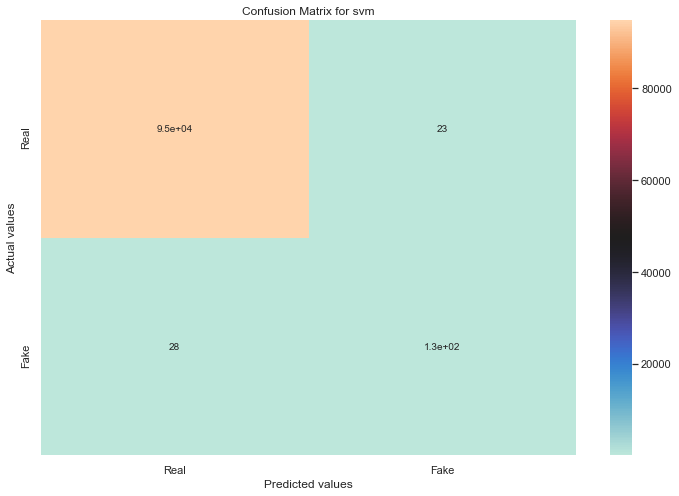

In [35]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for svm')
plt.show()

In [36]:
#confussion matrix ksvm
from sklearn.metrics import confusion_matrix, accuracy_score
cm_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(cm_ksvm)
accuracy_score(y_test, y_pred_ksvm)

[[94780     1]
 [   53   102]]


0.9994311957529283

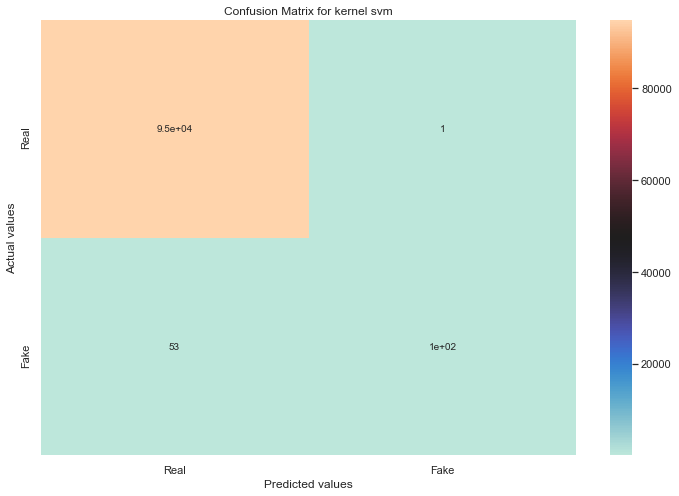

In [37]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_ksvm)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for kernel svm')
plt.show()

In [38]:
#confussion matrix navie bayes
from sklearn.metrics import confusion_matrix, accuracy_score
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
accuracy_score(y_test, y_pred_nb)

[[92577  2204]
 [   21   134]]


0.9765631583382489

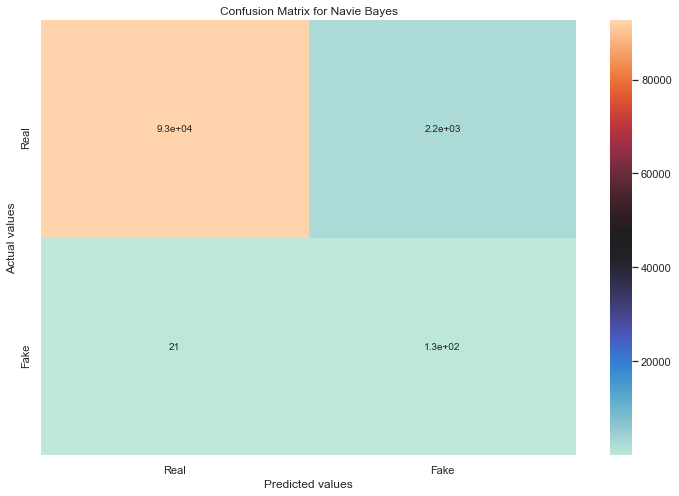

In [39]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_nb)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Navie Bayes')
plt.show()

In [40]:
#confussion matrix decision tree
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
accuracy_score(y_test, y_pred_dt)

[[94742    39]
 [   38   117]]


0.9991889272773237

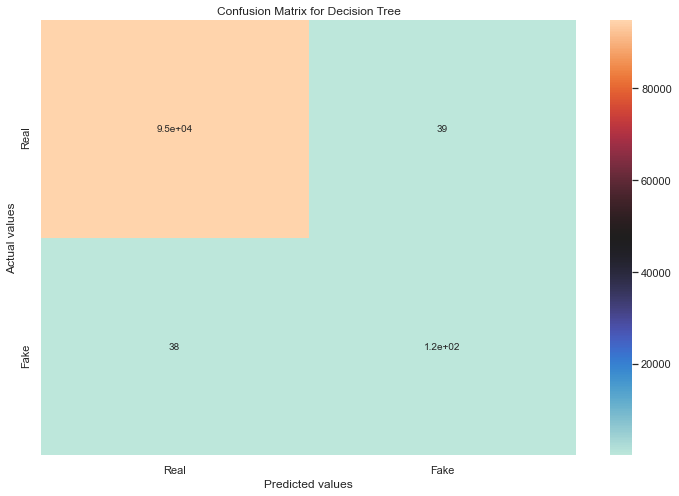

In [41]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [42]:
#confussion matrix random forest
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
accuracy_score(y_test, y_pred_rf)

[[94777     4]
 [   34   121]]


0.9995997303446532

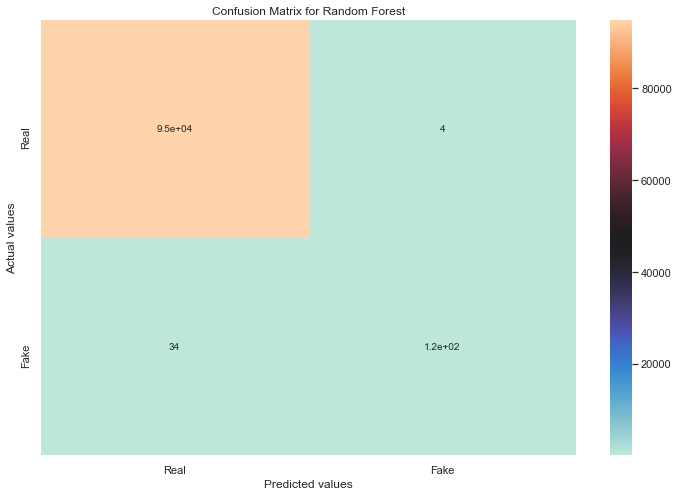

In [43]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [44]:
#confussion matrix xg boost
from sklearn.metrics import confusion_matrix, accuracy_score
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)
accuracy_score(y_test, y_pred_xg)

[[94777     4]
 [   31   124]]


0.9996313305806017

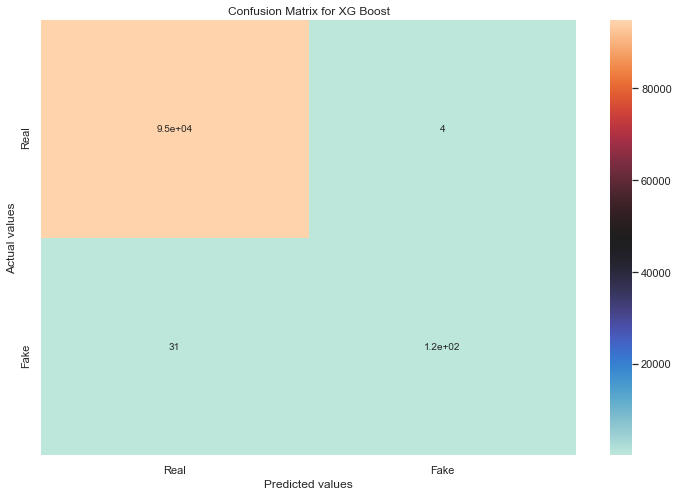

In [45]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_xg)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for XG Boost')
plt.show()

TUTAJ KOMPARATOR - XGBOOST WYCHODZI NAJLEPIEJ ALE TRZEBA KONKRETNEGO WIZUALNEGO PRZYKLADU - ZLOZENIA TEGO CO WCZESNIEJ 
CZYLI MODEL: 1. wylonienie najlepiej rokujacej metody na podstawie macierzy pomylek (confusion matrix) 
predicted vs actual values 
ktore najlepiej przewiduje zmienna kategoryczna 0/1 czy transakcja nosi znamiona oszustwa czy tez nie 
2. XG boost jako najlepiej rokujacy algorytm -> wytlumaczenie dlaczego i opisanie tego algorytmu w rozleglejszy sposob niz pozostalych uzytych do wylonienia go 

przedstawienie wszystkich wykorzystanych metod (rozdzial 2)
rozdzial 1: opisanie data science wedlug rozpiski z planu pracy 


opisac problem overfittingu danych -> nie zdaze raczej oprzec calej pracy na tym i skupic sie na przedziwdzialaniu np. porownac wyniki przed i po zastosowamiu metod zapobiegajacych overfittingowi 